# Online Vehicle Booking Market

# Fathima Sona Sherin

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Data Collection & Data Pre-processing

In [5]:
data_train = pd.read_csv(r"C:\Users\sonas\Downloads\train.csv")

In [6]:
col=['Total_booking']
data_train_label= pd.read_csv(r"C:\Users\sonas\Downloads\train_label.csv",header=None,names=col)

In [7]:
train=data_train.join(data_train_label)

In [8]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [9]:
data_test= pd.read_csv(r"C:\Users\sonas\Downloads\test.csv")

In [10]:
col=['Total_booking']
data_test_label= pd.read_csv(r"C:\Users\sonas\Downloads\test_label.csv",header=None,names=col)

In [13]:
test=data_test.join(data_test_label)

In [14]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


In [15]:
from datetime import datetime
import calendar

In [16]:
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"]= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"]= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"]= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"]= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [17]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,1/16/2012,6,Monday,January
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,11/10/2011,1,Thursday,November
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,4/12/2011,3,Tuesday,April
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,11/7/2012,1,Wednesday,November


# Visualizations

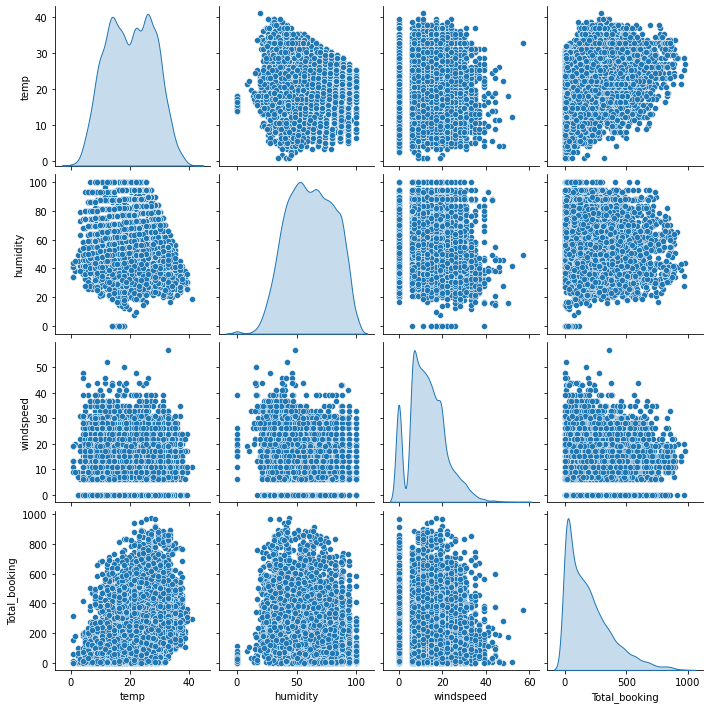

In [18]:
sns.pairplot(train[["temp","humidity","windspeed","Total_booking"]], diag_kind ='kde')

In [19]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot:>

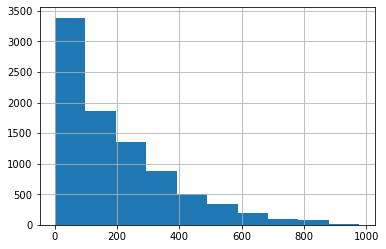

In [20]:
train.Total_booking.hist()

In [21]:
rev_stat=train.Total_booking.describe()
print(rev_stat)
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print('iqr=',iqr)
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_booking, dtype: float64
iqr= 243.0
The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [22]:
outliers=train[train.Total_booking>upper].index.tolist()
train[train.Total_booking>upper]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
27,5/2/2012 18:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,5/2/2012,18,Wednesday,May
30,7/10/2012 17:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,7/10/2012,17,Tuesday,July
52,6/5/2012 18:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,6/5/2012,18,Tuesday,June
70,5/18/2012 18:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,5/18/2012,18,Friday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,3/14/2012 8:00,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,3/14/2012,8,Wednesday,March
8582,10/15/2012 8:00,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,10/15/2012,8,Monday,October
8676,5/12/2012 13:00,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,5/12/2012,13,Saturday,May
8681,8/8/2012 17:00,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,8/8/2012,17,Wednesday,August


In [23]:
train.shape

(8708, 14)

In [24]:
for index in outliers:
    train.drop(index,inplace=True)

In [25]:
# After removing outliers
train.shape

(8466, 14)

In [26]:
#Missing value analysis
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
hour             0
weekday          0
month            0
dtype: int64

<AxesSubplot:xlabel='weather', ylabel='Total_booking'>

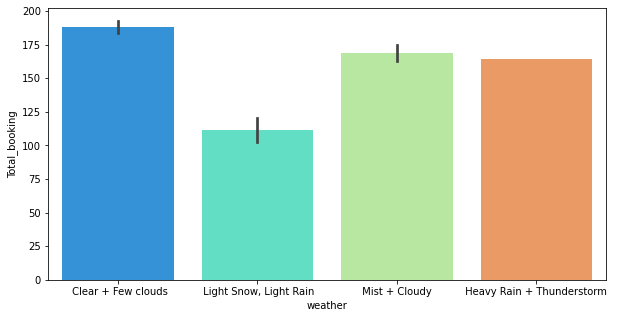

In [27]:
# Visualizing Total_booking Vs other features
plt.figure(figsize=(10,5))
sns.barplot(x = 'weather', y = 'Total_booking', data = train,palette='rainbow')

<AxesSubplot:xlabel='weekday', ylabel='Total_booking'>

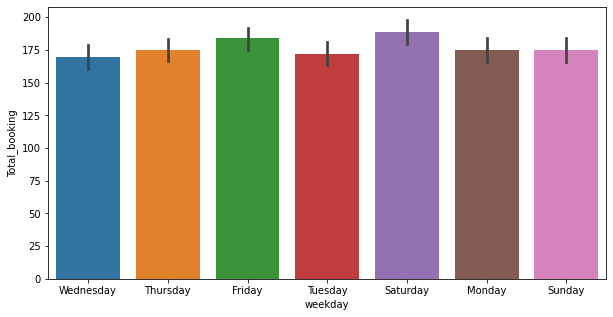

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'weekday', y = 'Total_booking', data = train)

<AxesSubplot:xlabel='month', ylabel='Total_booking'>

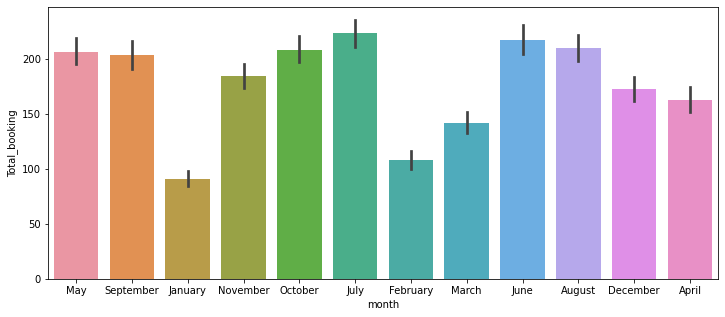

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'month', y = 'Total_booking', data = train)

<AxesSubplot:xlabel='season', ylabel='Total_booking'>

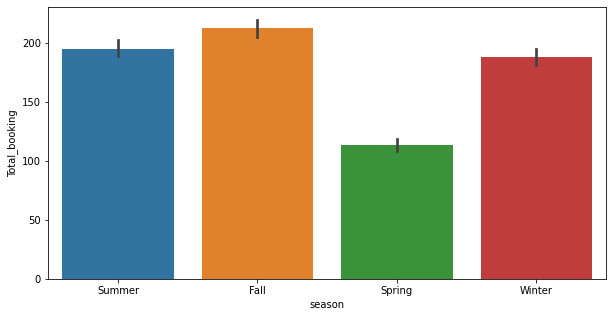

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'season', y = 'Total_booking', data = train)

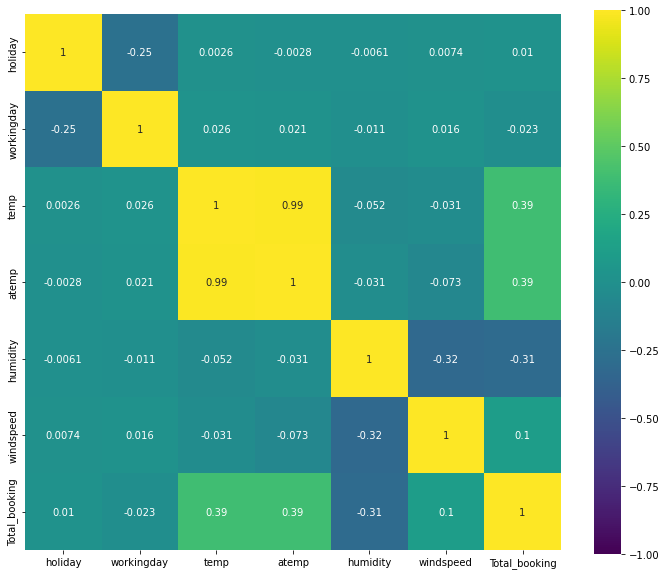

In [31]:
# Correlation Analysis
correlation = train.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation, cmap ='viridis', annot = True, vmax = 1, square = True,vmin=-1)
plt.show()

In [32]:
del(train["atemp"])

In [33]:
# Creating new columns from date time column
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"]= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"]= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"]= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"]= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [34]:
del(train["datetime"])

In [35]:
del(train["date"])

In [36]:

train.dtypes

season            object
holiday            int64
workingday         int64
weather           object
temp             float64
humidity           int64
windspeed        float64
Total_booking      int64
hour              object
weekday           object
month             object
dtype: object

In [37]:
train.columns.nunique()

11

In [38]:
train = pd.get_dummies(train)
train.head()

,holiday,workingday,temp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,22.14,77,16.9979,504,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,28.70,79,19.0012,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,5.74,50,22.0028,139,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,13.94,29,8.9981,209,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,30.34,51,19.0012,184,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
train.shape

(8466, 57)

# Splitting into X and y

In [40]:
X = train.drop('Total_booking', axis =1)
y = train['Total_booking']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6772, 56)
(1694, 56)


# Regression Analysis

In [41]:
# Decision Tree Model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
y_pred_DT = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

In [42]:
# RANDOM FOREST
RF_model = RandomForestRegressor( random_state = 0)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

In [43]:
# XG BOOST
XG_model = XGBRFRegressor()
XG_model.fit(X_train, y_train)
y_pred_XG = XG_model.predict(X_test)

In [44]:
# SVM 
SVM_model = SVR()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)

In [45]:
# KNN 
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)

In [46]:
# Gradient Boosting
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)

# Performance Metrics

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
print("R squared value for DT :", r2_score(y_test, y_pred_DT))
print("R squared value for RF:", r2_score(y_test, y_pred_RF))
print("R squared value for XG:", r2_score(y_test, y_pred_XG))
print("R squared value for SVM:", r2_score(y_test, y_pred_SVM))
print("R squared value for KNN:", r2_score(y_test, y_pred_KNN))
print("R squared value for GB:", r2_score(y_test, y_pred_GB))


print("MSE for DT :", mean_squared_error(y_test, y_pred_DT))
print("MSE for RF:", mean_squared_error(y_test, y_pred_RF))
print("MSE for XG:", mean_squared_error(y_test, y_pred_XG))
print("MSE for SVM:", mean_squared_error(y_test, y_pred_SVM))
print("MSE for KNN:", mean_squared_error(y_test, y_pred_KNN))
print("MSE for GB:", mean_squared_error(y_test, y_pred_GB))

R squared value for DT : 0.6682359545376466
R squared value for RF: 0.8354197771760357
R squared value for XG: 0.5130508896569834
R squared value for SVM: 0.1679652652268958
R squared value for KNN: 0.23878704656220506
R squared value for GB: 0.7178058017450006
MSE for DT : 8330.288665879574
MSE for RF: 4132.45733999822
MSE for XG: 12226.842270076166
MSE for SVM: 20891.623476073764
MSE for KNN: 19113.353978748524
MSE for GB: 7085.635599917186


# Ensemble Model

In [48]:
# RANDOM FOREST-

from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0)  

#fit the model
RF_reg = RF_reg.fit(X_train, y_train)

#Predict the model
y_pred_RFR = RF_reg.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_RFR))

R squared: 0.8382149833105221


# Grid search cv

In [49]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500, 1000, 1200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000, 1200]},
             verbose=2)

In [50]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 1200}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=40, n_estimators=1200, n_jobs=-1,
                      random_state=0)

In [52]:
cvrf_grid = grid_search.best_estimator_
#Predict the model
y_pred_clf = cvrf_grid.predict(X_test)
print("R squared value for GridSearch :", r2_score(y_test, y_pred_clf))
print("MSE for GridSearch :", mean_squared_error(y_test, y_pred_clf))

R squared value for GridSearch : 0.8382697341494291
MSE for GridSearch : 4060.897553461924


# FEATURE IMPORTANCE

<AxesSubplot:>

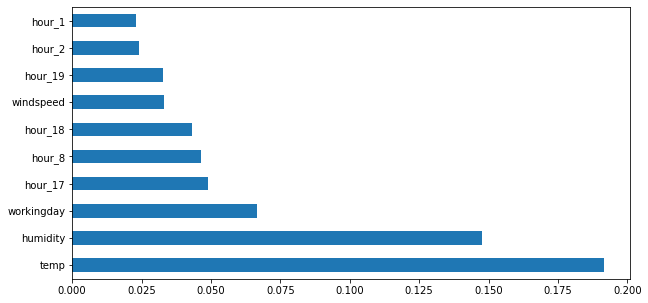

In [54]:
# feat_importances = pd.Series(cvrf_grid.feature_importances_, index=X_train.columns)
f, ax = plt.subplots(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')

# Comparing with the test-project dataset and predicting the output with grid search cv model

In [55]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,3/8/2012,3,Thursday,March
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,1/12/2012,12,Thursday,January
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,3/7/2012,22,Wednesday,March
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,5/12/2011,5,Thursday,May


In [56]:
del(test["datetime"])

In [57]:
del(test["atemp"])
del(test["date"])

In [58]:
test.shape

(2178, 11)

In [59]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'Total_booking', 'hour', 'weekday', 'month'],
      dtype='object')

In [60]:
test = pd.get_dummies(test)
test.head()

,holiday,workingday,temp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,21.32,48,35.0008,256,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,23.78,64,7.0015,87,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,11.48,100,27.9993,11,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,25.42,83,0.0000,84,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,25.42,43,23.9994,668,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
test.shape

(2178, 56)

In [62]:
# Fitting Grid Search Model to test dataset

In [64]:
New_pred = cvrf_grid.predict(test)
print("R squared for prediction v/s test_label:",r2_score(data_test_label, New_pred))
print("MSE for prediction v/s test_label :", mean_squared_error(data_test_label, New_pred))

R squared for prediction v/s test_label: 0.797753772723576
MSE for prediction v/s test_label : 6508.497062539411


# Appending the prediction values column with the test-project dataset

In [65]:
New_pred = pd.DataFrame(New_pred)
New_pred.columns = ['Predictions']
New_pred

,Predictions
0,214.892812
1,157.762059
2,77.260000
3,164.358417
4,444.000000
...,...
2173,12.273333
2174,138.090833
2175,135.948958
2176,24.306667


In [68]:
data_test1= pd.read_csv(r"C:\Users\sonas\Downloads\test-project.csv")
col=['Total_booking']
data_test_label1= pd.read_csv(r"C:\Users\sonas\Downloads\test_label.csv",header=None,names=col)
test=data_test.join(data_test_label)
Dataset_testpred = test.join(New_pred)
Dataset_testpred

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Predictions
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,214.892812
1,6/09/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,157.762059
2,3/06/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,77.260000
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,164.358417
4,6/02/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,444.000000
...,...,...,...,...,...,...,...,...,...,...,...
2173,3/08/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,12.273333
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,138.090833
2175,3/07/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,135.948958
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,24.306667
